In [1]:
import requests
import json
import pandas as pd

# import visulization tools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
### Ping API endpoint and load response into JSON

# Replace 'your_api_endpoint' with the actual API endpoint you want to query
api_endpoint = 'https://api.covidtracking.com/v2/us/daily.json'

# Make a GET request to the API
api_response = requests.get(api_endpoint)

# Check if the request was successful (status code 200)
if api_response.status_code == 200:

    # Parse the JSON data in the api_response
    json_data = api_response.json()

    # show top level keys from json response
    print(json_data.keys())

# if request was not successful
else:
    # Print an error message if the request was not successful
    print(f"Error: {api_response.status_code}")

dict_keys(['links', 'meta', 'data'])


In [5]:
for i in range(len(list(df.columns.values))):
    print('entry: {}'.format((df.columns.values)[i]))
    # if (df.columns.values)[i].startswith('outcomes'):
    #     print('starts cases: {}'.format((df.columns.values)[i]))
    # else:
    #     print('NO')
len(df.columns.values)

entry: date
entry: states
entry: cases.total.value
entry: cases.total.calculated.population_percent
entry: cases.total.calculated.change_from_prior_day
entry: cases.total.calculated.seven_day_change_percent
entry: testing.total.value
entry: testing.total.calculated.population_percent
entry: testing.total.calculated.change_from_prior_day
entry: testing.total.calculated.seven_day_change_percent
entry: outcomes.hospitalized.currently.value
entry: outcomes.hospitalized.currently.calculated.population_percent
entry: outcomes.hospitalized.currently.calculated.change_from_prior_day
entry: outcomes.hospitalized.currently.calculated.seven_day_change_percent
entry: outcomes.hospitalized.currently.calculated.seven_day_average
entry: outcomes.hospitalized.in_icu.currently.value
entry: outcomes.hospitalized.in_icu.currently.calculated.population_percent
entry: outcomes.hospitalized.in_icu.currently.calculated.change_from_prior_day
entry: outcomes.hospitalized.in_icu.currently.calculated.seven_day_c

30

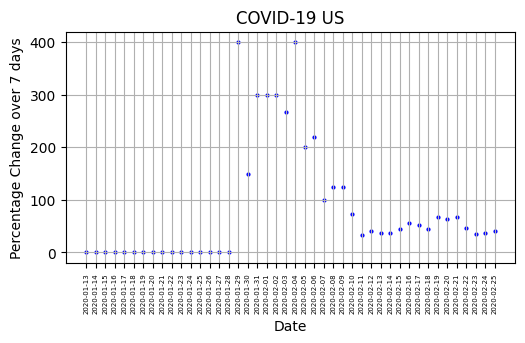

In [10]:
# number of days from start of data collection (01/13/2020)
num_days_window = 45

# Use pd.json_normalize to convert the JSON to a DataFrame
normalized_data_df = pd.json_normalize(json_data['data'])

# Data cleaning and sorting
    # sort by date
    # replace NAN entries with 0's
normalized_data_df.sort_values(by='date', ascending=True, inplace=True)
normalized_data_df=normalized_data_df.fillna(0)

# Rename the columns for clarity
# normalized_data_df.columns = ['Col1', 'Col2', 'Col3']

# Display the DataFrame column
# print(normalized_data_df['cases.total.calculated.population_percent'])

##############################################################################

### Figure Layout
# create 2x2 grid to align plots
plt_grid = GridSpec(2,2)

# create figure for plots to be put on
fig = plt.figure(figsize=(10, 6))

### Scatterplot Subplot
# add plot to grid position 0,0 (top left)
total_pop_pct = fig.add_subplot(plt_grid[0,0])

# create scatter plot within subplot
total_pop_pct.scatter(x = normalized_data_df['date'][0:(num_days_window-1)], 
                        y = normalized_data_df['testing.total.calculated.seven_day_change_percent'][0:(num_days_window-1)], 
                        c = 'blue',
                        s=4)

### Formatting Scatterplot Subplot
# assign xtick lables
total_pop_pct.set_xticks(normalized_data_df['date'][0:(num_days_window-1)])
# format xtick labels
total_pop_pct.set_xticklabels(labels=normalized_data_df['date'][0:(num_days_window-1)], rotation=90, fontsize=str(num_days_window/9))

# change X and Y axis lables
total_pop_pct.set_xlabel('Date')
total_pop_pct.set_ylabel('Percentage Change over 7 days')

# change plot title
total_pop_pct.set_title('COVID-19 US')

# add gridlines to the plot
total_pop_pct.grid(visible=True, which='major', axis='both')

### Show plot
# assure fit of plot
plt.tight_layout()
plt.show()


# save plot
# save1 = plt.savefig('/Users/AdamSoubh/Documents/Code/covid_analysis/results/total_pop_pct_dataset1.png', dpi=1000)

